In [30]:
import torch
from torch import tensor
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import functional as F

import numpy as np
import matplotlib.pyplot as plt

In [31]:
! nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [32]:
#importing RetinaNet
from torchvision.models.detection import retinanet_resnet50_fpn, RetinaNet_ResNet50_FPN_Weights

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = retinanet_resnet50_fpn(weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT)
model.eval()
model.to(device)

RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, eps=0.0)


In [33]:
#load image
from PIL import Image


def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = F.to_tensor(image).unsqueeze(0)  # Convert to tensor and add batch dimension
    return image

image_path = "/content/drive/MyDrive/Object detection/images/4.jpg"  # Replace with your image path
image = load_image(image_path).to(device)

In [34]:
# object detection

with torch.no_grad():
    outputs = model(image)

threshold = 0.5
outputs = [{k: v.to('cpu').numpy() for k, v in t.items()} for t in outputs]

boxes = outputs[0]['boxes']
scores = outputs[0]['scores']
labels = outputs[0]['labels']

filtered_indices = np.where(scores > threshold)[0]
filtered_boxes = boxes[filtered_indices]
filtered_scores = scores[filtered_indices]
filtered_labels = labels[filtered_indices]

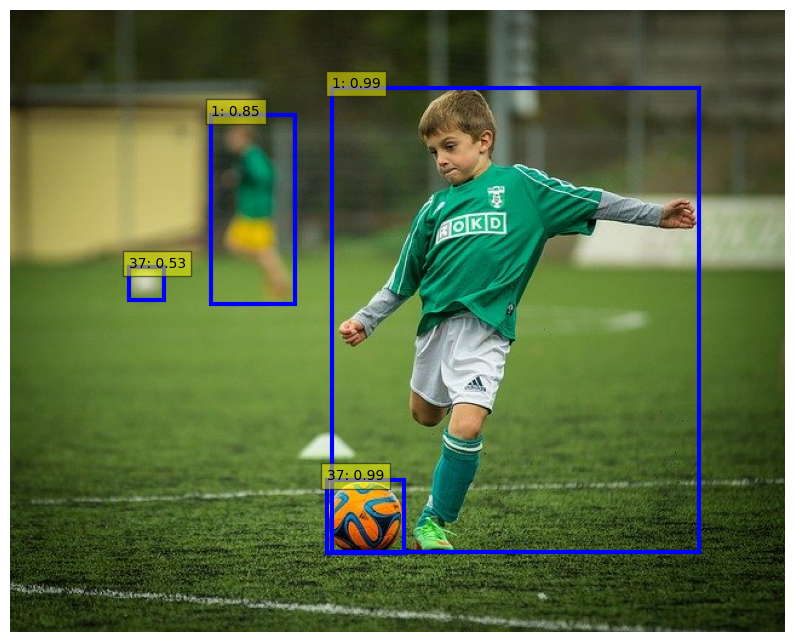

In [35]:
def plot_results(image, boxes, scores, labels):
    plt.figure(figsize=(10, 10))
    plt.imshow(image.permute(1, 2, 0).cpu().numpy())
    ax = plt.gca()
    for box, score, label in zip(boxes, scores, labels):
        xmin, ymin, xmax, ymax = box
        rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='blue', linewidth=3)
        ax.add_patch(rect)
        ax.text(xmin, ymin, f'{label}: {score:.2f}', bbox=dict(facecolor='yellow', alpha=0.5), clip_box=ax.clipbox, clip_on=True)
    plt.axis('off')
    plt.show()


plot_results(image[0], filtered_boxes, filtered_scores, filtered_labels)